# DBSCAN. Практическая работа

## Цель практической работы

Научиться строить модели кластеризации с помощью метода DBSCAN.

## Что входит в работу


- Загрузите данные и проведите разведочный анализ.
- Предположите оптимальное количество кластеров.
- Постройте модель кластеризации DBSCAN.
- Определите оптимальное количество и структуру кластеров.
- Интерпретируйте полученные результаты.

## Что оценивается 

1. Выполнены все задания.
2. Сделаны выводы по результатам разведочного анализа данных.
3. Объяснены выбранные гиперпараметры модели кластеризации.
4. Сделаны выводы о количестве и структуре кластеров.
5. Сделаны выводы по результатам кластеризации.

# Задача

Имеется некоторый набор данных `gt_2015.csv` о производительности и других параметрах ветряных электростанций:
* AT — температура окружающей среды.
* PT — давление окружающей среды.
* AH — влажность окружающей среды. 
* AFDP — перепад давления на воздушном фильтре. 
* GTEP — давление на выходе из газовой турбины. 
* TIT — температура на входе в турбину.
* TAT — температура на выходе из турбины. 
* TEY — энергоотдача турбины.
* CDP — давление нагнетания компрессора.
* CO — выбросы угарного газа. 
* NOX — выбросы оксидов азота.

Решите задачу кластеризации электростанций для дальнейшего совместного управления схожими электростанциями.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('gt_2015.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [3]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,7384.000000,7384.00000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,17.225259,1014.50911,68.647464,3.598909,26.130149,1078.974689,546.642484,133.993380,12.097025,3.129986,59.890509
std,8.095783,6.89543,13.541116,0.610226,4.473737,19.762449,5.489066,16.179208,1.136601,2.234962,11.132464
min,-6.234800,989.40000,24.085000,2.368800,17.698000,1016.000000,516.040000,100.020000,9.870800,0.212800,25.905000
25%,11.073250,1009.67500,59.447250,3.117300,23.147000,1070.500000,544.747500,126.255000,11.465750,1.808175,52.399000
50%,17.456500,1014.00000,70.952000,3.538500,25.331000,1080.300000,549.720000,131.600000,11.933000,2.533400,56.838500
75%,23.684750,1018.30000,79.653750,4.194825,30.018250,1099.900000,550.030000,147.160000,13.148000,3.702550,65.093250
max,37.103000,1036.60000,96.666000,5.239500,40.716000,1100.400000,550.590000,179.500000,15.159000,41.097000,119.680000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      7384 non-null   float64
 1   AP      7384 non-null   float64
 2   AH      7384 non-null   float64
 3   AFDP    7384 non-null   float64
 4   GTEP    7384 non-null   float64
 5   TIT     7384 non-null   float64
 6   TAT     7384 non-null   float64
 7   TEY     7384 non-null   float64
 8   CDP     7384 non-null   float64
 9   CO      7384 non-null   float64
 10  NOX     7384 non-null   float64
dtypes: float64(11)
memory usage: 634.7 KB


Данные распределены ненормально. Нулевых значений нет. Присутствуют выбросы в колонках CO и NOX.

# Задание 2

Предположите по результатам разведочного анализа данных, какие группы электростанций существуют, чем они отличаются, каково их количество.

Не могу точно судить характеристики станций, но по анализу видно, что 50% ~= mean, что значит, что довольно большой процент станций работает нормально. В остальных: та, или иная характеристика может иметь завышенное/заниженное значение.

# Задание 3

Постройте модель кластеризации DBSCAN. Подберите оптимальные гиперпараметры, руководствуясь как результатами сеточного поиска, так и результатами анализа данных в предыдущих заданиях.

In [65]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

best_score = []
best_eps =[]
best_min_samples = []

min_samples = list (range(5,50,5))
eps = list(np.linspace(0.5,10,num=20))

for ep in eps:
    for sample in min_samples:
        model = DBSCAN(eps = ep, min_samples = sample)
        model.fit(df_scaled)
        if set(model.labels_) > {3}: #минимальное кол-во кластеров
            if silhouette_score(df_scaled, model.labels_) > -0.3 and silhouette_score(df_scaled, model.labels_) < 0.3:
                best_score.append(silhouette_score(df_scaled, model.labels_))
                best_eps.append(ep)
                best_min_samples.append(sample)
            else:
                pass
        else:
            pass

print(f'Best score: {best_score}')

Best score: [-0.033334510075926346, -0.005445315820793318, 0.06440977062026879, 0.1105673764735353, 0.061917935019928705, 0.13692305275385105, 0.05973760096836636, 0.0663528557336787, 0.07807568598605531, 0.18795369981754312, 0.16101472239654505, 0.1510334322267884, 0.1661979121598753, 0.21822169063902452, 0.21522955773697117]


In [66]:
best_model = (f'Best_score:{best_score[2]}, Best eps:{best_eps[2]}, Best_sampels:{best_min_samples[2]}')
best_model

'Best_score:0.06440977062026879, Best eps:1.0, Best_sampels:15'

In [67]:
model = DBSCAN(eps=1.0, min_samples=15)
model.fit(df_scaled)

silhouette_score(df_scaled, model.labels_)

0.06440977062026879

In [68]:
df['labels'] = model.labels_

<Axes: xlabel='AP', ylabel='AH'>

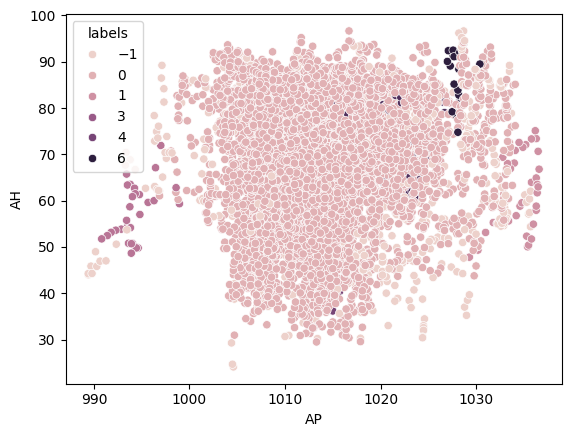

In [69]:
sns.scatterplot(x=df.AP,y=df.AH,hue=df['labels'])

In [70]:
df.labels.value_counts()

labels
 0    6375
-1     853
 1      36
 5      36
 2      30
 6      21
 4      18
 3      15
Name: count, dtype: int64

# Задание 4

Интерпретируйте результаты кластеризации: объясните, чем схожи электростанции в каждом кластере и чем аномальные электростанции отличаются от остальных. 

Можно увидеть, что большинство точек (станций) соответствуют средним значениям = Класс 0. Несколько являются выбросами = Класс -1. Остальные классы имеют какие-либо отклонения по каким-то характеристикам. Посмотреть по каким именно - можно построив профили и др. визуализацию.

**Как отправить работу на проверку**

Скачайте файл с работой в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint на вкладке меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.
